# Exercício 1
Utilize o método da projeção para determinar a aproximação da função $f = sen(z \pi)$ no intervalo $-2 < x < 2$ utilizando as funções $1$, $x^2$, $x^3$, $x^4$, $x^5$. Considere $z = 1 + \frac{0.5N}{19}$. Apresente os gráficos da aproximação junto com a função dada.

## Resolução



A função que iremos aproximar é da forma:

$$
f = sen(z \pi x)
$$

Temos que:

$$
z = 1 + \frac{0.5 N}{19} \\
N = 0 \Rightarrow z = 1
$$

Portanto:

$$
f = sen(\pi x)
$$

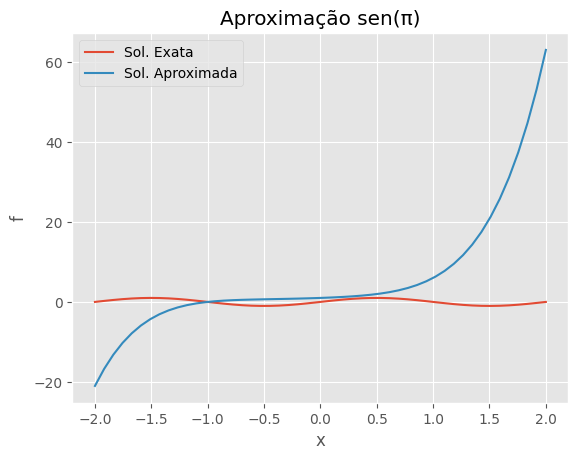

In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

def sol_exata(x):
    return np.sin(np.pi * x)

def sol_approx(x):
    return 1 + x + x**2 + x**3 + x**4 + x**5

x = np.linspace(-2, 2)

plt.plot(x, sol_exata(x), label='Sol. Exata')
plt.plot(x, sol_approx(x), label='Sol. Aproximada')
plt.title('Aproximação sen(π)')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()